In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [2]:
df = pd.read_csv('telco_chrun_encoded.csv')
df = df.sample(frac = 0.25,random_state = 3)

In [3]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,...,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,...,1687.95,1,93.775000,1,0,0,0,0,1,0
2170,1,0,0,0,30,1,0,0,0,0,...,2555.90,1,85.196667,1,0,0,0,0,1,0
4230,0,0,0,0,5,1,0,0,0,1,...,346.40,1,69.280000,0,0,0,0,0,1,0
510,0,0,0,0,61,1,1,1,0,1,...,6300.15,0,103.281148,1,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 5571 to 3151
Data columns (total 25 columns):
gender                             1758 non-null int64
senior                             1758 non-null int64
partner                            1758 non-null int64
dependents                         1758 non-null int64
tenure                             1758 non-null int64
phone_service                      1758 non-null int64
multiple_lines                     1758 non-null int64
online_security                    1758 non-null int64
online_backup                      1758 non-null int64
device_protection                  1758 non-null int64
tech_support                       1758 non-null int64
streaming_tv                       1758 non-null int64
streaming_movies                   1758 non-null int64
paperless_billing                  1758 non-null int64
monthly_charges                    1758 non-null float64
total_charges                      1758 non-null float64
churn 

In [5]:
y = df['churn']
X = df.drop('churn',axis = 1)

0    1318
1     440
Name: churn, dtype: int64


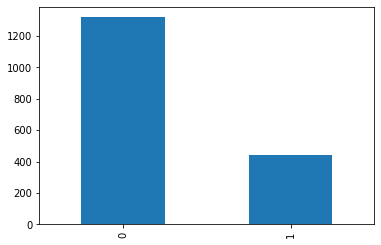

In [6]:
print(y.value_counts())
y.value_counts().plot(kind = 'bar')

##### BUILDING PREDICTIVE ALGORITHM USING RANDOM FOREST

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_stand = ss.fit_transform(X)

X_train_stand = ss.fit_transform(X_train)
X_test_stand = ss.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

Confusion matrix - Train : 
 [[912   0]
 [  0 318]]
Overall accuracy :  1.0
AUC - Train :  1.0

Confusion matrix - Test : 
 [[363  43]
 [ 66  56]]
Overall accuracy - Test :  0.7935606060606061
AUC - Test :  0.8251534361624808


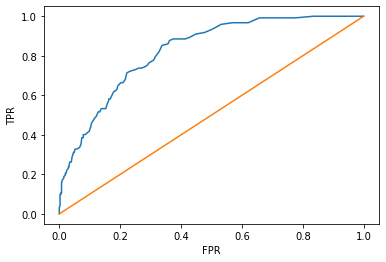

In [10]:
#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score

rfc.fit(X_train_stand,y_train)
y_train_ypred = rfc.predict(X_train_stand)
y_train_prob = rfc.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = rfc.predict(X_test_stand)
y_test_prob = rfc.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### HYPERPARAMETERS TUNING FOR RANDOM FOREST

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state = 3)

params = {
    'n_estimators' : sp_randint(50,200),
    'max_features' : sp_randint(1,24),
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,20),
    'min_samples_leaf' : sp_randint(1,20),
    'criterion' : ['gini','entropy']
}

rsearchcv_rfc = RandomizedSearchCV(rfc,param_distributions=params,scoring = 'roc_auc',\
                   n_iter=200,cv = 3,random_state = 3,return_train_score=True, n_jobs=-1)

rsearchcv_rfc.fit(X_stand,y)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [12]:
rsearchcv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 1,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 123}

In [13]:
rscv_df = pd.DataFrame(rsearchcv_rfc.cv_results_)
rscv_df[rscv_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
90,0.367407,0.008353,0.030176,0.001518,entropy,8,1,4,2,123,...,0.835131,0.853927,0.846856,0.00835,1,0.917711,0.92089,0.915516,0.918039,0.002206


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(**rsearchcv_rfc.best_params_)

Confusion matrix - Train : 
 [[889  23]
 [184 134]]
Overall accuracy :  0.8317073170731707
AUC - Train :  0.9167959698775241

Confusion matrix - Test : 
 [[388  18]
 [ 85  37]]
Overall accuracy - Test :  0.8049242424242424
AUC - Test :  0.8414560284260679


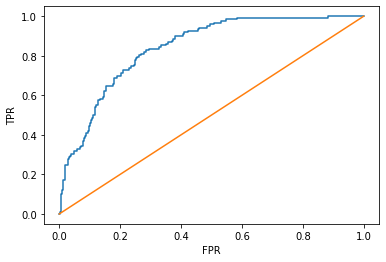

In [15]:
#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score

rfc.fit(X_train_stand,y_train)
y_train_ypred = rfc.predict(X_train_stand)
y_train_prob = rfc.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = rfc.predict(X_test_stand)
y_test_prob = rfc.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [16]:
imp = pd.DataFrame(rfc.feature_importances_,index = X.columns,columns=['importance'])
imp = imp.sort_values('importance',ascending = False)
imp

,importance
tenure,0.134006
total_charges,0.112217
avg_monthly_charges,0.099961
monthly_charges,0.099366
contract-two_year,0.083490
payment_method-electronic_check,0.056463
internet_service-fiber_optic,0.047326
internet_service-no,0.042525
contract-one_year,0.038152
online_security,0.032662


### KNN ALGORITHM

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

params = {
    'n_neighbors' : sp_randint(1,15),
    'p' : sp_randint(1,5)
}

rsearch_knn = RandomizedSearchCV(knn, param_distributions=params,cv = 3, return_train_score = True, random_state = 3,n_iter=50,\
                             n_jobs = -1)

rsearch_knn.fit(X_stand,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018612395F08>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000186123F7588>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [18]:
rsearch_knn.best_params_

{'n_neighbors': 12, 'p': 3}

Confusion matrix - Train : 
 [[827  85]
 [134 184]]
Overall accuracy :  0.8219512195121951
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.86      0.91      0.88       912
           1       0.68      0.58      0.63       318

    accuracy                           0.82      1230
   macro avg       0.77      0.74      0.75      1230
weighted avg       0.81      0.82      0.82      1230

AUC - Train :  0.8720139578506013

Confusion matrix - Test : 
 [[359  47]
 [ 59  63]]
Overall accuracy - Test :  0.7992424242424242
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       406
           1       0.57      0.52      0.54       122

    accuracy                           0.80       528
   macro avg       0.72      0.70      0.71       528
weighted avg       0.79      0.80      0.80       528

AUC - Test :  0.8129290155858837


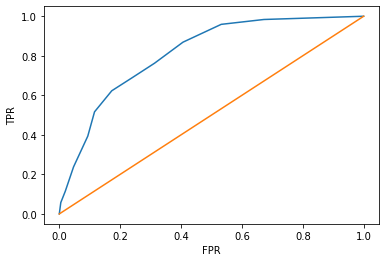

In [19]:
knn  = KNeighborsClassifier(**rsearch_knn.best_params_)

#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

knn.fit(X_train_stand,y_train)
y_train_ypred = knn.predict(X_train_stand)
y_train_prob = knn.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = knn.predict(X_test_stand)
y_test_prob = knn.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### STACKING RESULTS OF 3 LEARNERS (RANDOM FOREST, KNN AND LOGISTIC REGRESSION)

Confusion matrix - Train : 
 [[826  86]
 [146 172]]
Overall accuracy :  0.8113821138211382
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.85      0.91      0.88       912
           1       0.67      0.54      0.60       318

    accuracy                           0.81      1230
   macro avg       0.76      0.72      0.74      1230
weighted avg       0.80      0.81      0.80      1230

AUC - Train :  0.8558320920225091

Confusion matrix - Test : 
 [[359  47]
 [ 57  65]]
Overall accuracy - Test :  0.803030303030303
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       406
           1       0.58      0.53      0.56       122

    accuracy                           0.80       528
   macro avg       0.72      0.71      0.71       528
weighted avg       0.80      0.80      0.80       528

AUC - Test :  0.843111523863361


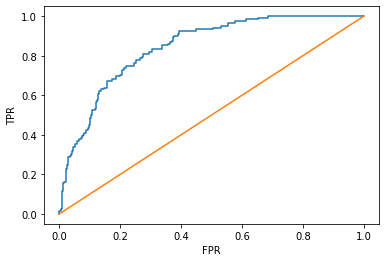

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

lr.fit(X_train_stand,y_train)


#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

lr.fit(X_train_stand,y_train)
y_train_ypred = lr.predict(X_train_stand)
y_train_prob = lr.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = lr.predict(X_test_stand)
y_test_prob = lr.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [22]:
from sklearn.ensemble import VotingClassifier
lr = LogisticRegression(solver = 'liblinear')
knn = KNeighborsClassifier(**rsearch_knn.best_params_)
rfc = RandomForestClassifier(**rsearchcv_rfc.best_params_)

##### HARD VOTING

In [24]:
clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)], voting='hard')
clf.fit(X_train_stand,y_train)

y_train_predict = clf.predict(X_train_stand)
y_test_predict = clf.predict(X_test_stand)

# print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy - Train : ',accuracy_score(y_train,y_train_predict))
print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_predict))

# print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

# print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))

Overall accuracy - Train :  0.8235772357723578
Overall accuracy - Test :  0.8011363636363636


##### SOFT VOTING - Equal Weightages

Confusion matrix - Train : 
 [[849  63]
 [140 178]]
Overall accuracy :  0.8349593495934959
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.86      0.93      0.89       912
           1       0.74      0.56      0.64       318

    accuracy                           0.83      1230
   macro avg       0.80      0.75      0.77      1230
weighted avg       0.83      0.83      0.83      1230

AUC - Train :  0.8894440306741698

Confusion matrix - Test : 
 [[367  39]
 [ 62  60]]
Overall accuracy - Test :  0.8087121212121212
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       406
           1       0.61      0.49      0.54       122

    accuracy                           0.81       528
   macro avg       0.73      0.70      0.71       528
weighted avg       0.80      0.81      0.80       528

AUC - Test :  0.8388920293951385


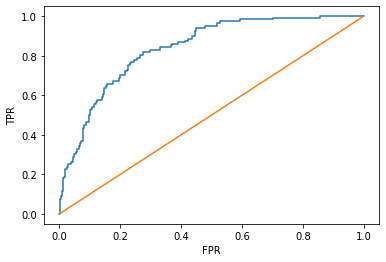

In [25]:
clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)], voting='soft')
clf.fit(X_train_stand,y_train)

#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

clf.fit(X_train_stand,y_train)
y_train_ypred = clf.predict(X_train_stand)
y_train_prob = clf.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = clf.predict(X_test_stand)
y_test_prob = clf.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### SOFT VOTING - Unequal Weightage

Confusion matrix - Train : 
 [[853  59]
 [149 169]]
Overall accuracy :  0.8308943089430895
Classification Report - Train 
:                precision    recall  f1-score   support

           0       0.85      0.94      0.89       912
           1       0.74      0.53      0.62       318

    accuracy                           0.83      1230
   macro avg       0.80      0.73      0.76      1230
weighted avg       0.82      0.83      0.82      1230

AUC - Train :  0.8981125179300452

Confusion matrix - Test : 
 [[368  38]
 [ 66  56]]
Overall accuracy - Test :  0.803030303030303
Classification Report - Test : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       406
           1       0.60      0.46      0.52       122

    accuracy                           0.80       528
   macro avg       0.72      0.68      0.70       528
weighted avg       0.79      0.80      0.79       528

AUC - Test :  0.8378825809577647


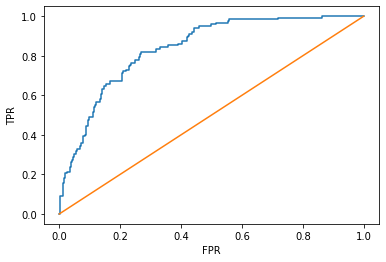

In [26]:
clf = VotingClassifier(estimators=[('lr',lr), ('knn',knn), ('rfc',rfc)], voting='soft',weights=[1,2,3])
clf.fit(X_train_stand,y_train)

#### TRAIN
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report

clf.fit(X_train_stand,y_train)
y_train_ypred = clf.predict(X_train_stand)
y_train_prob = clf.predict_proba(X_train_stand)[:,-1]

y_train_ypred

y_train_prob

print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

print('Classification Report - Train \n: ',classification_report(y_train,y_train_ypred))

print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))
print()

#### TEST

y_test_ypred = clf.predict(X_test_stand)
y_test_prob = clf.predict_proba(X_test_stand)[:,-1]

print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

print('Classification Report - Test : \n',classification_report(y_test,y_test_ypred))

print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()